<a href="https://colab.research.google.com/github/Aditya-567/Lung-AND-Oral-Cancer-ML-Model/blob/lextrone/lung_cancer_graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lung cancer Prediction**
Graphs Analysis

Employing exploratory data analysis (EDA) techniques, an effective cancer prediction machine learning model can accurately assess an individual's cancer risk at a relatively low cost. By leveraging EDA to uncover patterns and insights within the data, this model can provide reliable and personalized cancer risk evaluations. The data for this analysis is sourced from the online lung cancer prediction system's website, offering a convenient and accessible platform for gathering the necessary information to train and validate the model.

In [3]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#For ignoring warning
import warnings
warnings.filterwarnings("ignore")

In [4]:

df=pd.read_csv('/content/sample_data/survey lung cancer.csv')
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,No,Yes,Yes,No,No,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,YES
1,M,74,Yes,No,No,No,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,YES
2,F,59,No,No,No,Yes,No,Yes,No,Yes,No,Yes,Yes,No,Yes,NO
3,M,63,Yes,Yes,Yes,No,No,No,No,No,Yes,No,No,Yes,Yes,NO
4,F,63,No,Yes,No,No,No,No,No,Yes,No,Yes,Yes,No,No,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
304,F,56,No,No,No,Yes,Yes,Yes,No,No,Yes,Yes,Yes,Yes,No,YES
305,M,70,Yes,No,No,No,No,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,YES
306,M,58,Yes,No,No,No,No,No,Yes,Yes,Yes,Yes,No,No,Yes,YES
307,M,67,Yes,No,Yes,No,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,YES


In [5]:

df.shape

(309, 16)

In [6]:

#Checking for Duplicates
df.duplicated().sum()

33

In [7]:

#Removing Duplicates
df=df.drop_duplicates()

In [8]:

#Checking for null values
df.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [9]:

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 276 entries, 0 to 283
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 276 non-null    object
 1   AGE                    276 non-null    int64 
 2   SMOKING                276 non-null    object
 3   YELLOW_FINGERS         276 non-null    object
 4   ANXIETY                276 non-null    object
 5   PEER_PRESSURE          276 non-null    object
 6   CHRONIC DISEASE        276 non-null    object
 7   FATIGUE                276 non-null    object
 8   ALLERGY                276 non-null    object
 9   WHEEZING               276 non-null    object
 10  ALCOHOL CONSUMING      276 non-null    object
 11  COUGHING               276 non-null    object
 12  SHORTNESS OF BREATH    276 non-null    object
 13  SWALLOWING DIFFICULTY  276 non-null    object
 14  CHEST PAIN             276 non-null    object
 15  LUNG_CANCER            

In [10]:
#Let's check what's happened now
df

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,No,Yes,Yes,No,No,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,YES
1,M,74,Yes,No,No,No,Yes,Yes,Yes,No,No,No,Yes,Yes,Yes,YES
2,F,59,No,No,No,Yes,No,Yes,No,Yes,No,Yes,Yes,No,Yes,NO
3,M,63,Yes,Yes,Yes,No,No,No,No,No,Yes,No,No,Yes,Yes,NO
4,F,63,No,Yes,No,No,No,No,No,Yes,No,Yes,Yes,No,No,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,F,59,No,Yes,Yes,Yes,No,No,Yes,Yes,No,Yes,No,Yes,No,YES
280,F,59,Yes,No,No,No,Yes,Yes,Yes,No,No,No,Yes,No,No,NO
281,M,55,Yes,No,No,No,No,Yes,Yes,No,No,No,Yes,No,Yes,NO
282,M,46,No,Yes,Yes,No,No,No,No,No,No,No,No,Yes,Yes,NO


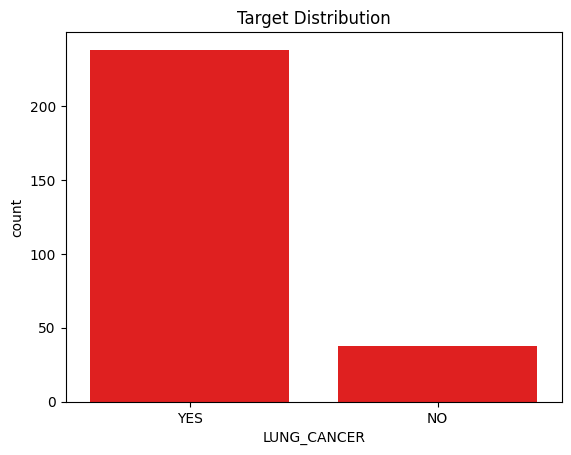

In [11]:

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='LUNG_CANCER', data=df, color='red')  # Change 'skyblue' to the desired color
plt.title('Target Distribution')
plt.show()

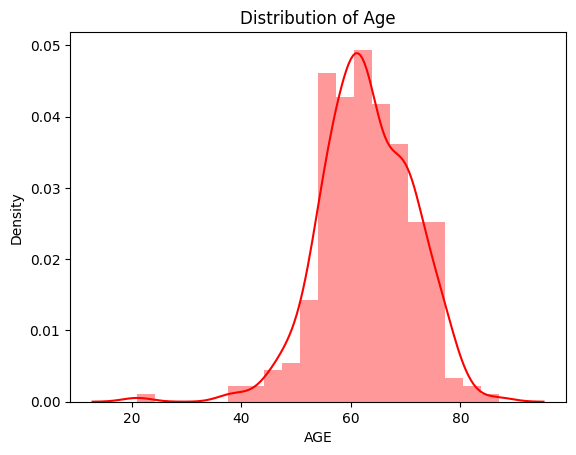

In [12]:
# prompt:

import matplotlib.pyplot as plt
# Checking the distribution of the 'AGE' column
sns.distplot(df['AGE'], color='red')
plt.title('Distribution of Age')
plt.show()


In [14]:
# function for plotting
def plot(col, df=df):
    return df.groupby(col)['LUNG_CANCER'].value_counts(normalize=True).unstack().plot(kind='bar', figsize=(8,5), color=['green', 'red'])


<Axes: xlabel='SMOKING'>

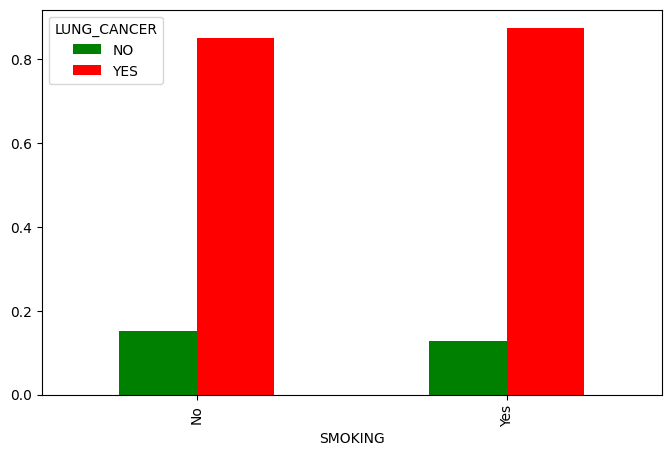

In [17]:
# prompt:

# Checking the relationship between 'SMOKING' and 'LUNG_CANCER'
plot('SMOKING')


<Axes: xlabel='YELLOW_FINGERS'>

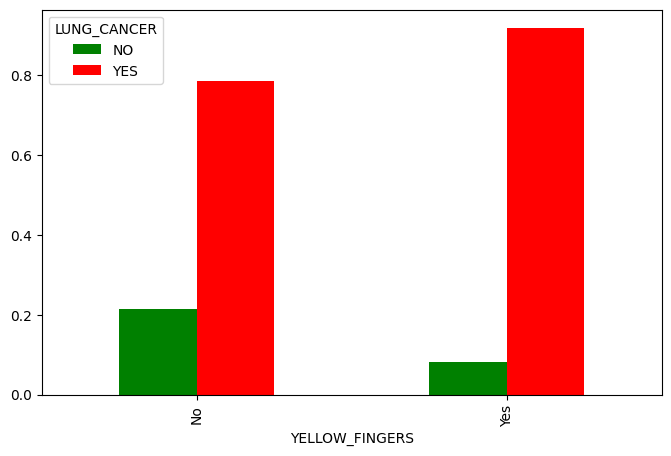

In [18]:
# prompt:

# Checking the relationship between 'YELLOW_FINGERS' and 'LUNG_CANCER'
plot('YELLOW_FINGERS')


<Axes: xlabel='ANXIETY'>

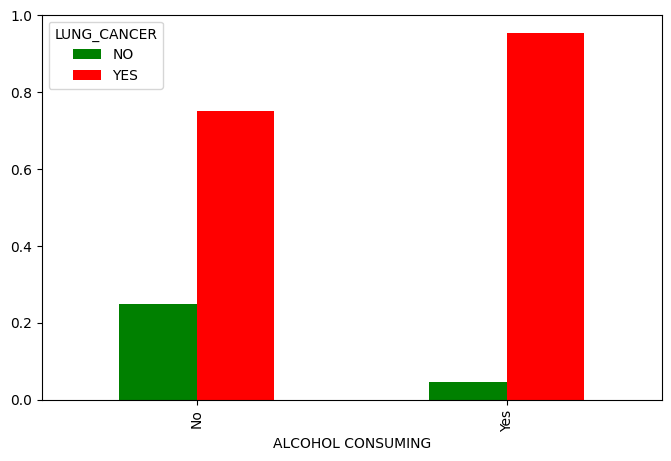

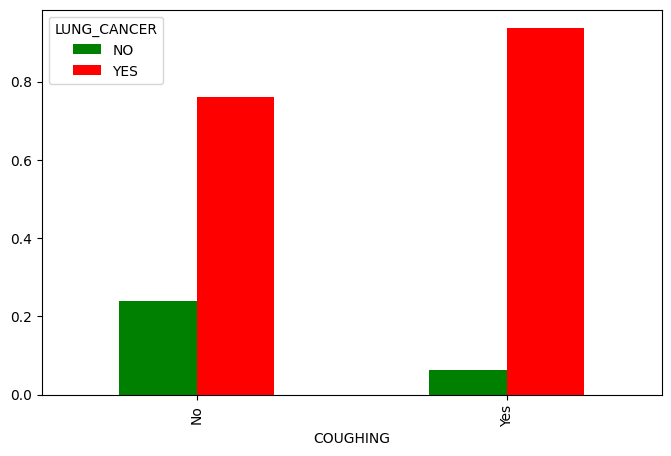

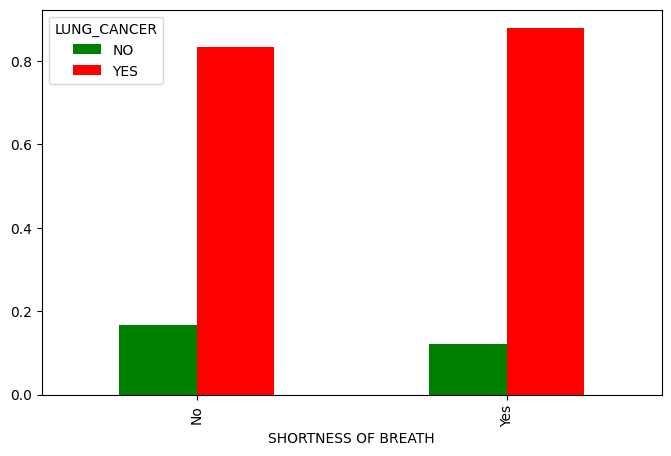

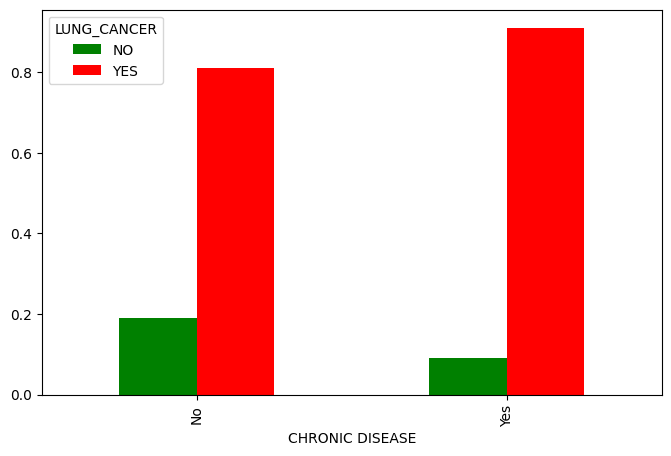

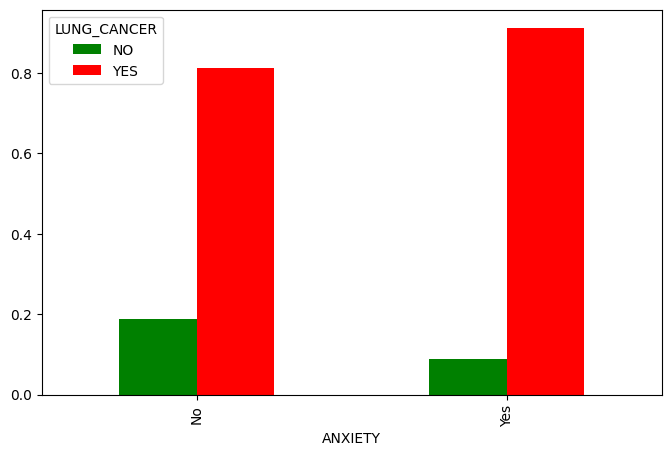

In [24]:
# prompt:

# Checking the relationship between 'ALCOHOL_CONSUMING' and 'LUNG_CANCER'
plot('ALCOHOL CONSUMING')


# Checking the relationship between 'COUGHING' and 'LUNG_CANCER'
plot('COUGHING')


# Checking the relationship between 'SHORTNESS_OF_BREATH' and 'LUNG_CANCER'
plot('SHORTNESS OF BREATH')


# Checking the relationship between 'CHRONIC DISEASE' and 'LUNG_CANCER'
plot('CHRONIC DISEASE')


# Checking the relationship between 'ANXIETY' and 'LUNG_CANCER'
plot('ANXIETY')



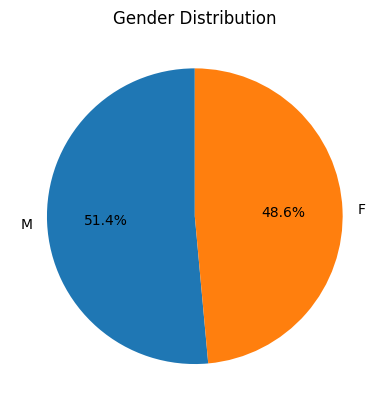

In [25]:
# prompt: generate pie chart

import matplotlib.pyplot as plt
df_pie = df['GENDER'].value_counts()

plt.pie(df_pie, autopct="%1.1f%%", labels=df_pie.index, startangle=90)
plt.title('Gender Distribution')
plt.show()


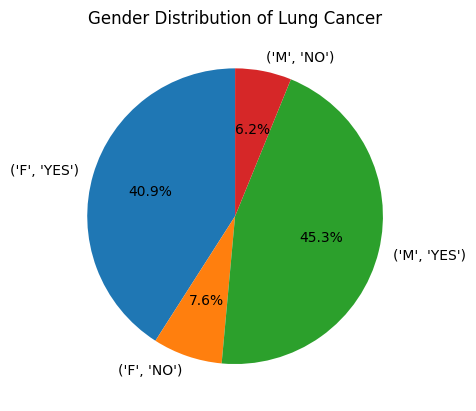

In [26]:
# prompt: generate pie chart how much male have lung cancer nad how much female have lunc cancer

import matplotlib.pyplot as plt
df_pie = df.groupby('GENDER')['LUNG_CANCER'].value_counts()

plt.pie(df_pie, autopct="%1.1f%%", labels=df_pie.index, startangle=90)
plt.title('Gender Distribution of Lung Cancer')
plt.show()
